In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('iris-data.csv')

In [3]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


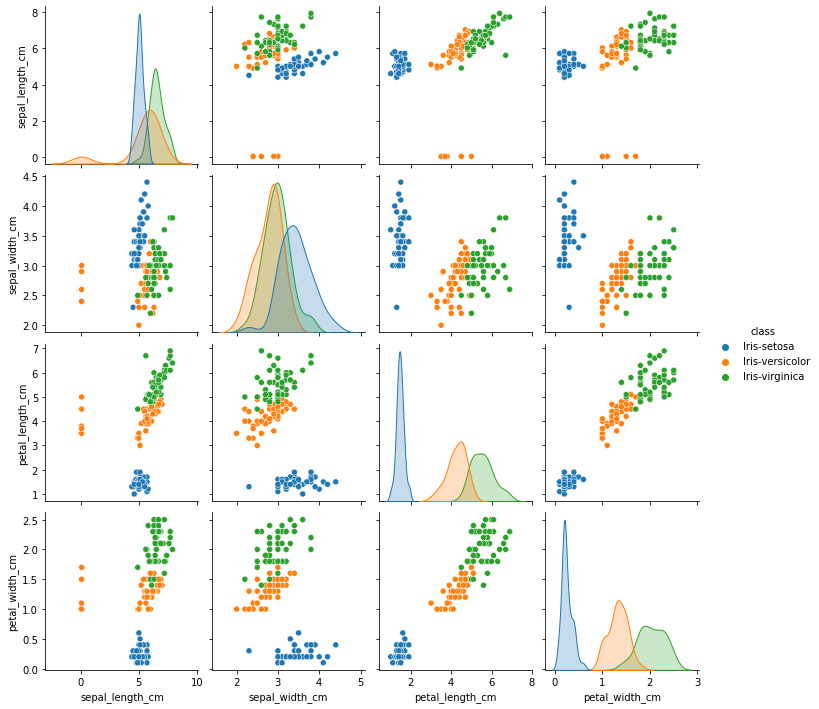

In [74]:
sns.pairplot(df, hue='class', height = 2.5)

In [8]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

In [9]:
final_df = df[df['class'] != 'Iris-virginica']

In [10]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


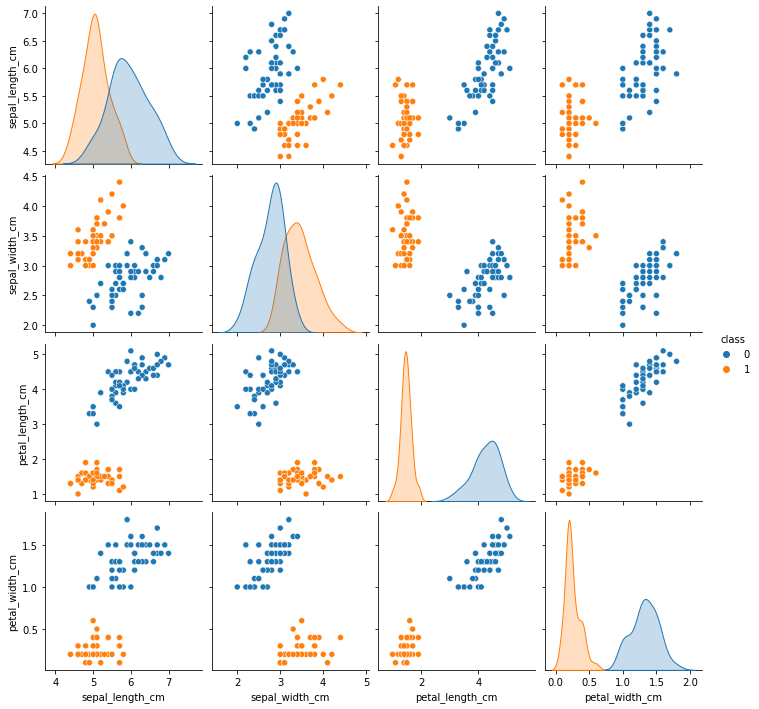

In [75]:
sns.pairplot(final_df, hue='class', height = 2.5)

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

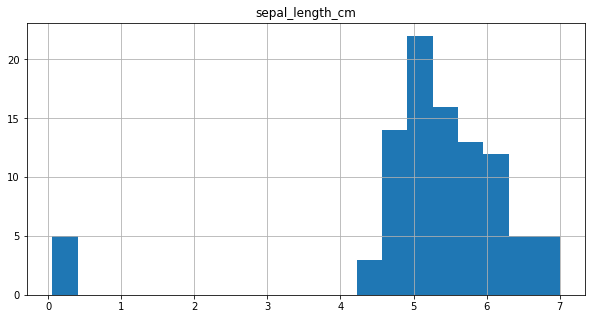

In [12]:
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

In [14]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

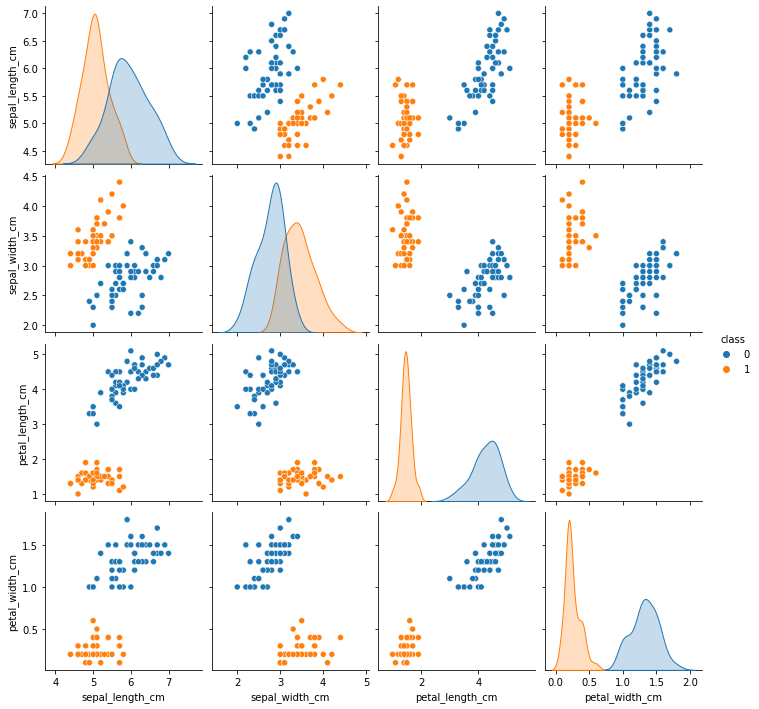

In [76]:
sns.pairplot(final_df, hue='class', height = 2.5)

In [16]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [17]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [18]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train
y_ts_arr = y_test

In [19]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (75, 4)
Output Shape (19, 4)


In [71]:
class LogisticRegression():
    
    def __init__(self, X, y, bias = 0, zero_weight = - 1):
        self.X = np.array(X)
        self.y = np.array(y)
        self.first_dim = len(X)
        self.bias = bias
        self.weights = np.zeros(self.first_dim)
        self.weights[0] = zero_weight
        
    
    def backward(self):
        X = self.X
        print(X.shape, self.weights.shape)
        result = self.sigmoid(np.dot(self.weights, X) + self.bias)
        labels = np.transpose(self.y, (4))
        l = (-1 / self.first_dim)
        #to do strange name
        print(labels.shape, result.shape, self.y.shape)
        print(result)
        cost = l * (np.sum(labels * np.log(result)) \
               + ((1 - labels)) * np.log(1 - result))
        
        #Gradien calculation
        delta_weight = l * np.dot(X, (result - labels).T)
        delta_bias = l * np.sum(result - labels)
        
        return delta_weight, delta_bias, cost
    
    
    def fit(self, l_rate = 0.01, iters = 10000):
        #to do strange name
        costs = []
        for i in range(iters):
            delta_weight, delta_bias, cost = self.backward()
            
            self.weights -= l_rate * delta_weight.T
            self.bias -= l_rate * delta_bias
            
            if i % 50 == 0:
                costs.append(cost)
        return costs
            
    @staticmethod
    def predict(final_pred, m):
        y_pred = np.zeros((1, m))
        for i in range(final_pred.shape[1]):
            if final_pred[0][i] > 0.5:
                y_pred[0][i] = 1
        return y_pred
        
        
    @staticmethod
    def squrare_loss(y_predict, y_true):
        return (y_predict - y_true)**2
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [72]:
model = LogisticRegression(X_tr_arr, y_tr_arr)

In [73]:
coeff, gradient, costs = model.fit()

(75, 4) (75,)


ValueError: axes don't match array